<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,740.381494,979.867925,275.573965,704.293960
1,0.0,1.0,41.321385,70.807138,64.285975,-639.404796,-452.990298,183.824076,-636.814374
2,0.0,2.0,97.569298,71.702146,80.680950,310.923701,570.876096,334.852670,236.023426
3,0.0,3.0,95.847263,60.930988,21.264605,341.123846,529.166702,224.172644,304.994057
4,0.0,4.0,36.355496,24.921419,84.847584,-47.402208,108.722291,146.432498,-37.710207
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-364.877424,-140.835989,192.874164,-333.710153
249996,999.0,246.0,35.459513,28.969407,64.695515,49.702867,188.827302,115.894859,72.932442
249997,999.0,247.0,60.281445,89.820202,64.100453,-66.762920,157.439180,196.707365,-39.268185
249998,999.0,248.0,29.142842,36.286090,55.851661,-208.125899,-76.845306,96.749113,-173.594419


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,740.381494,979.867925,275.573965,704.293960
1,0.0,1.0,41.321385,70.807138,64.285975,-639.404796,-452.990298,183.824076,-636.814374
2,0.0,2.0,97.569298,71.702146,80.680950,310.923701,570.876096,334.852670,236.023426
3,0.0,3.0,95.847263,60.930988,21.264605,341.123846,529.166702,224.172644,304.994057
4,0.0,4.0,36.355496,24.921419,84.847584,-47.402208,108.722291,146.432498,-37.710207
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-364.877424,-140.835989,192.874164,-333.710153
249996,999.0,246.0,35.459513,28.969407,64.695515,49.702867,188.827302,115.894859,72.932442
249997,999.0,247.0,60.281445,89.820202,64.100453,-66.762920,157.439180,196.707365,-39.268185
249998,999.0,248.0,29.142842,36.286090,55.851661,-208.125899,-76.845306,96.749113,-173.594419


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    56.430038  74.617667  ...  275.573965   704.293960
      1.0    41.321385  70.807138  ...  183.824076  -636.814374
      2.0    97.569298  71.702146  ...  334.852670   236.023426
      3.0    95.847263  60.930988  ...  224.172644   304.994057
      4.0    36.355496  24.921419  ...  146.432498   -37.710207
...                ...        ...  ...         ...          ...
999.0 245.0  96.120114  89.727149  ...  192.874164  -333.710153
      246.0  35.459513  28.969407  ...  115.894859    72.932442
      247.0  60.281445  89.820202  ...  196.707365   -39.268185
      248.0  29.142842  36.286090  ...   96.749113  -173.594419
      249.0  30.233196  79.460010  ...   81.170067 -1091.416328

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    56.430038  74.617667  ...  275.573965   704.293960
      1.0    41.321385  70.807138  ...  183.824076  -636.814374
      2.0    97.569298  71.702146  ...  334.852670   236.023426
      3.0    95.847263  60.930988  ...  224.172644   304.994057
      4.0    36.355496  24.921419  ...  146.432498   -37.710207
...                ...        ...  ...         ...          ...
999.0 245.0  96.120114  89.727149  ...  192.874164  -333.710153
      246.0  35.459513  28.969407  ...  115.894859    72.932442
      247.0  60.281445  89.820202  ...  196.707365   -39.268185
      248.0  29.142842  36.286090  ...   96.749113  -173.594419
      249.0  30.233196  79.460010  ...   81.170067 -1091.416328

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,740.381494,979.867925,275.573965,704.293960
1,0.0,1.0,41.321385,70.807138,64.285975,-639.404796,-452.990298,183.824076,-636.814374
2,0.0,2.0,97.569298,71.702146,80.680950,310.923701,570.876096,334.852670,236.023426
3,0.0,3.0,95.847263,60.930988,21.264605,341.123846,529.166702,224.172644,304.994057
4,0.0,4.0,36.355496,24.921419,84.847584,-47.402208,108.722291,146.432498,-37.710207
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-364.877424,-140.835989,192.874164,-333.710153
249996,999.0,246.0,35.459513,28.969407,64.695515,49.702867,188.827302,115.894859,72.932442
249997,999.0,247.0,60.281445,89.820202,64.100453,-66.762920,157.439180,196.707365,-39.268185
249998,999.0,248.0,29.142842,36.286090,55.851661,-208.125899,-76.845306,96.749113,-173.594419


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    56.430038  74.617667  ...  275.573965   704.293960
      1.0    41.321385  70.807138  ...  183.824076  -636.814374
      2.0    97.569298  71.702146  ...  334.852670   236.023426
      3.0    95.847263  60.930988  ...  224.172644   304.994057
      4.0    36.355496  24.921419  ...  146.432498   -37.710207
...                ...        ...  ...         ...          ...
999.0 245.0  96.120114  89.727149  ...  192.874164  -333.710153
      246.0  35.459513  28.969407  ...  115.894859    72.932442
      247.0  60.281445  89.820202  ...  196.707365   -39.268185
      248.0  29.142842  36.286090  ...   96.749113  -173.594419
      249.0  30.233196  79.460010  ...   81.170067 -1091.416328

[250000 rows x 7 columns]

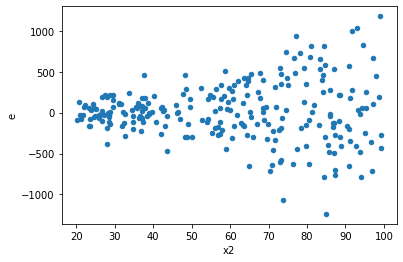

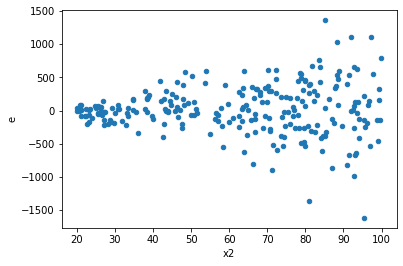

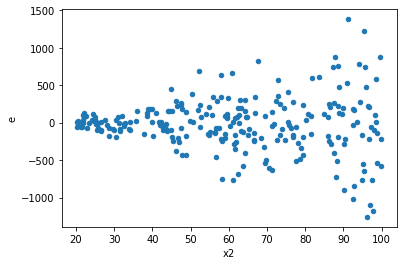

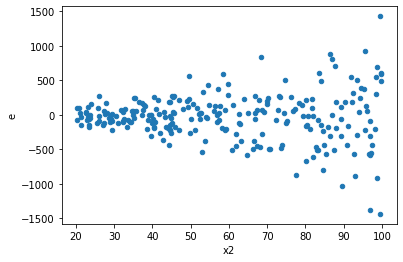

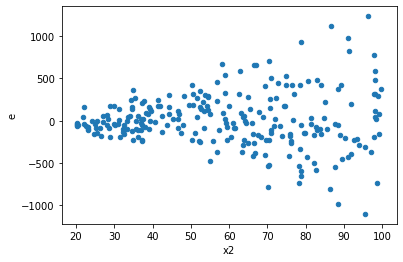

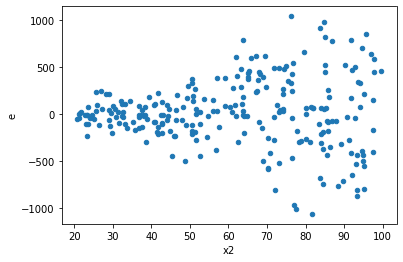

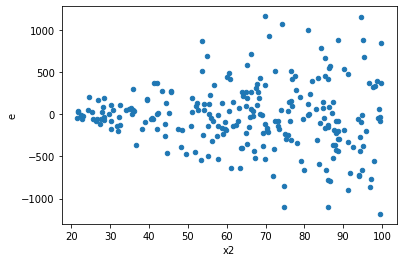

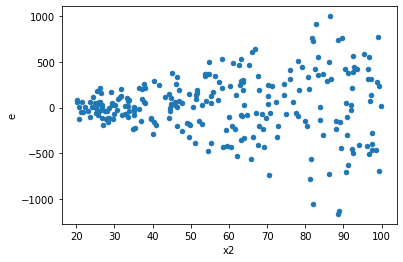

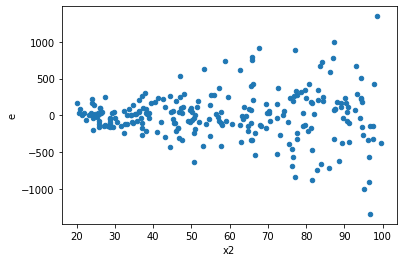

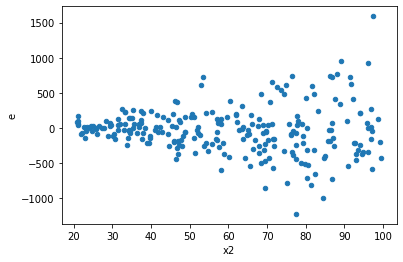

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,2439876.7447970742,24112808.545315456,25153.368503062622,248585.6551063449,9.882797808018342,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,2833552.071700409,24488818.29405784,29211.87702783927,252462.04426863752,8.642445126961139,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,2567502.1186629874,23805319.382611375,26469.094006834923,245415.6637382616,9.271781787275744,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,2122320.8588309577,23950630.08045093,21879.59648279338,246913.71216959722,11.285112701405435,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,1789675.4354093883,19768442.609112892,18450.262220715344,203798.37741353497,11.045825526789365,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,2259441.5656970073,22883547.14497635,23293.21201749492,235912.85716470465,10.127965906441615,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,5786161.999433967,24689833.288229562,59651.154633339866,254534.36379618105,4.267048397650265,7.536193891155563e-12,0.9999999999962319,3.768096945577781e-12,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,1785413.5449929556,20796046.15194,18406.325206112946,214392.22837051546,11.647747498197706,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,2411450.9504986885,19075653.45749253,24860.319077306067,196656.2212112632,7.910446386457781,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,2439876.7447970742,24112808.545315456,25153.368503062622,248585.6551063449,9.882797808018342,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,2833552.071700409,24488818.29405784,29211.87702783927,252462.04426863752,8.642445126961139,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,2567502.1186629874,23805319.382611375,26469.094006834923,245415.6637382616,9.271781787275744,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,2122320.8588309577,23950630.08045093,21879.59648279338,246913.71216959722,11.285112701405435,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,1789675.4354093883,19768442.609112892,18450.262220715344,203798.37741353497,11.045825526789365,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,2259441.5656970073,22883547.14497635,23293.21201749492,235912.85716470465,10.127965906441615,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,5786161.999433967,24689833.288229562,59651.154633339866,254534.36379618105,4.267048397650265,7.536193891155563e-12,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,1785413.5449929556,20796046.15194,18406.325206112946,214392.22837051546,11.647747498197706,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,2411450.9504986885,19075653.45749253,24860.319077306067,196656.2212112632,7.910446386457781,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64